## Костюков Максим Сергеевич
Лабораторная работа номер 1
Введем начальные условия, узлы сетки и значения в них
Средствами sagemath введем переменую `x` и установим функцию

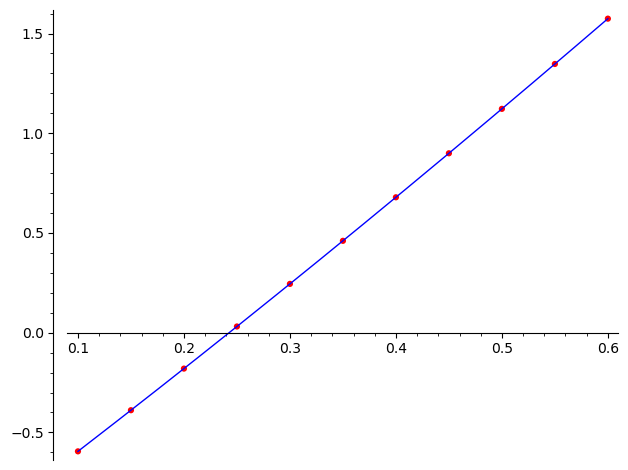

In [68]:
target_x = 0.37
left_border = 0.1
right_border = 0.6
steps_count = 10
step = (right_border - left_border)/steps_count
x_axis = [left_border + i * step for i in range(steps_count + 1)]


x = var('x')
y = 4*x-cos(x)

values = [y(x=i) for i in x_axis]
p = y.plot(xmin=left_border, xmax=right_border)
p += point(zip(x_axis, values), color='red', pointsize=20)
p.show()

Функция `lagrange` конструирует интерполяционный полином Лагранжа `n`-ого порядка.

In [43]:
def lagrange(n, values, nodes):
    assert len(nodes) - 1 == n
    polinomial = 0
    for i in range(len(nodes)):
        sum_element = values[nodes[i]]
        for j in range(0, len(nodes)):
            if i!=j:
                sum_element *= (x-x_axis[nodes[j]])/(x_axis[nodes[i]]-x_axis[nodes[j]])
        polinomial += sum_element
    return polinomial


In [44]:
closest_left_node = int((target_x - 0.1) / step)

L1 = lagrange(1, values, [closest_left_node, closest_left_node+1])
L2 = lagrange(2, values, [closest_left_node-1,closest_left_node, closest_left_node+1])

In [45]:
R1 = diff(y, x, 2)*(target_x-x_axis[closest_left_node])*(target_x-x_axis[closest_left_node+1])/2

In [46]:
R2 = diff(y, x, 3)*(target_x-x_axis[closest_left_node-1])*(target_x-x_axis[closest_left_node])*(target_x-x_axis[closest_left_node+1])/6

In [47]:
R1_max = R1.find_local_maximum(0.35, 0.4)[0]
R1_min = R1.find_local_minimum(0.35, 0.4)[0]
R2_min = R2.find_local_minimum(0.3, 0.4)[0]
R2_max = R2.find_local_maximum(0.3, 0.4)[0]
print(R1_max, R1_min, R2_max, R2_min, sep = "\n")

-0.00027631830007103584
-0.0002818118121456192
2.7259282637928806e-06
2.0686415211750518e-06


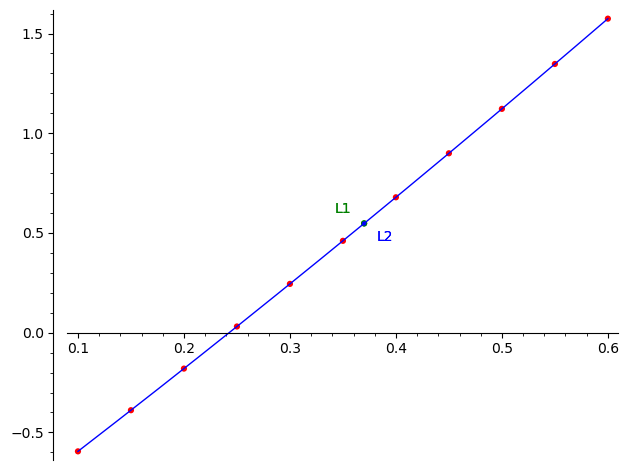

0.547672654393966


In [70]:
p += point((target_x, L1(x=target_x)), color='green', size=20)
p += text('L1', (target_x-0.02, L1(x=target_x)+0.07), color='green')
p += point((target_x, L2(x=target_x)), color='blue', size = 10)
p += text('L2', (target_x+0.02, L1(x=target_x)-0.07), color='blue')
p.show()

In [51]:
if R1_min <  y(x=target_x) - L1(x=target_x) < R1_max:
    print("Победа")

Победа


In [52]:
if R2_min < y(x=target_x) - L2(x=target_x) < R2_max:
    print("Победа")

Победа
